In [35]:
import sklearn

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
import numpy as np


In [38]:
import pandas as pd

In [39]:
import seaborn as sns


In [40]:
df = sns.load_dataset("mpg")

In [41]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
from datetime import date
df.dropna(axis=1, inplace=True)
df['age'] = date.today().year - df['model_year']
df.drop(["acceleration", "displacement", "model_year"], axis=1, inplace=True)
df = df.filter(['mpg', 'cylinders', 'horsepower', 'weight', 'age', 'origin'])
df = pd.get_dummies(df, drop_first=True)

In [42]:
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

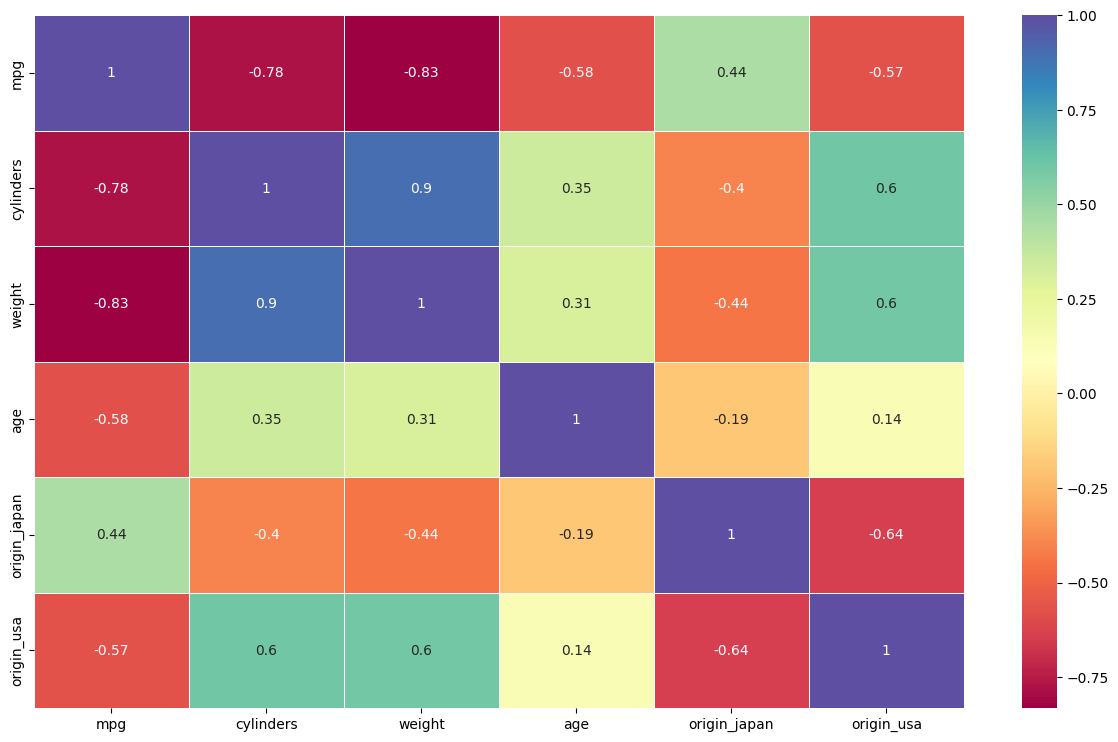

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='Spectral')


In [52]:
X = df.drop(["mpg"], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
accuracies = cross_val_score(estimator=lm_model, X=X_train, y=y_train, cv=10)

In [58]:
accuracies.mean()

0.8013080530799602

In [49]:
lm_model = LinearRegression()

In [53]:
lm_model.fit(X_train, y_train)

LinearRegression()

In [48]:
lm_model.coef_

array([ 0.31533946, -0.00647894, -0.82533006, -0.31811452, -2.43516473])

In [49]:
coefs = pd.DataFrame(lm_model.coef_, index=X.columns, columns=['Coefficient'])
coefs

,Coefficient
cylinders,0.315339
weight,-0.006479
age,-0.825330
origin_japan,-0.318115
origin_usa,-2.435165


In [51]:
y_pred = lm_model.predict(X_test)
y_pred

array([31.92654415, 29.38395201, 20.87768981, 17.1735201 , 12.773284  ,
       26.64914646, 27.82900581,  9.54677064, 17.22137706, 21.79225484,
       12.80464458, 35.77710427, 24.64621286, 14.18318911, 23.31906378,
        6.47074317, 29.70789914, 25.81182003, 16.18474626, 35.74470956,
       24.30441561, 18.76305019, 28.654053  , 28.8207201 , 15.04635869,
       35.02619328, 26.72356553, 24.51222334, 21.62734083,  8.43887147,
       28.3149265 , 35.99803466, 19.90866797, 25.49589469, 33.77658126,
       12.50764736, 23.57793861, 22.1608356 , 12.73294013, 27.84692694,
       27.05272006, 27.86532963, 21.57030188,  7.84825357, 24.0186958 ,
       34.51371048, 27.67199549, 25.74377498, 23.53489168, 28.64634123,
       21.7112519 , 33.23632467, 32.02078784, 10.74934958, 28.54140662,
        9.65190394, 19.64951027, 29.29315305, 22.64421962, 20.09727626,
       16.48571806, 31.10121409, 23.51593642, 21.27227052, 20.77903545,
       24.99451176, 24.59247501, 32.31640861, 27.41876416, 12.84

In [52]:
compare_dict = {"Actual": y_test, "Predicted": y_pred}
compare_df = pd.DataFrame(compare_dict)
compare_df.head()

,Actual,Predicted
198,33.0,31.926544
396,28.0,29.383952
33,19.0,20.877690
208,13.0,17.173520
93,14.0,12.773284


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
from sklearn.model_selection import cross_val_score

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = sns.load_dataset("titanic")

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()
df.drop(["embarked", "class", "alive"], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   who          891 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


KeyError: "['embarked' 'class' 'alive'] not found in axis"

<AxesSubplot:>

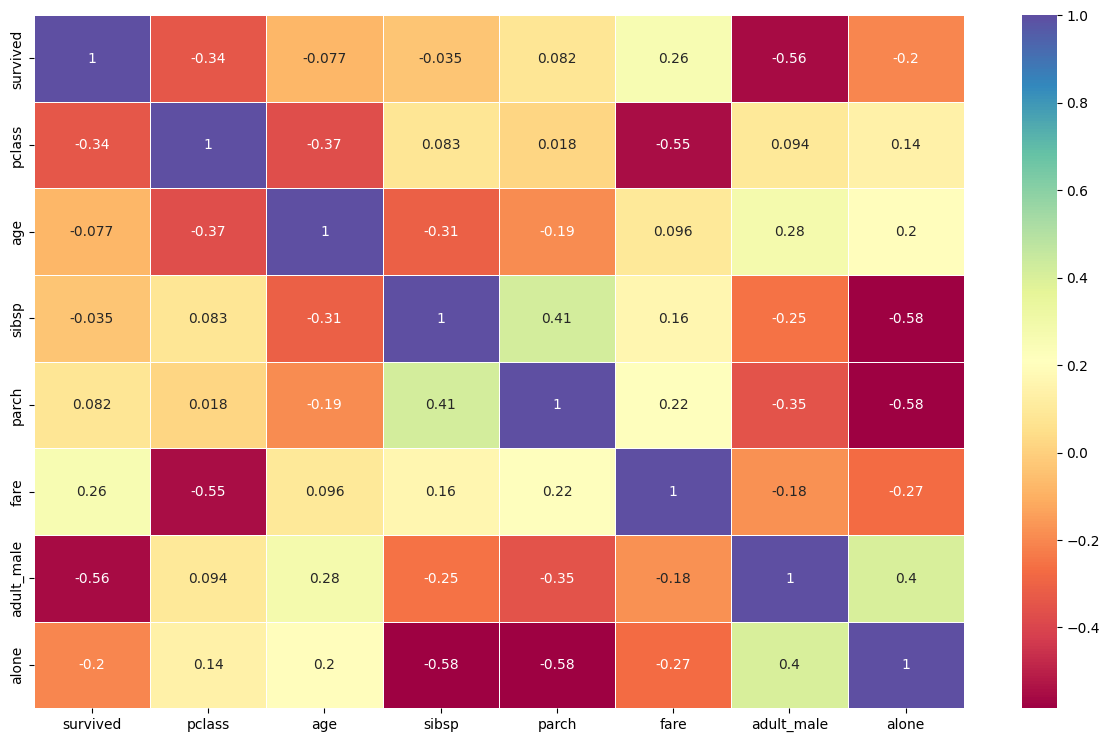

In [13]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='Spectral')

<AxesSubplot:xlabel='deck', ylabel='count'>

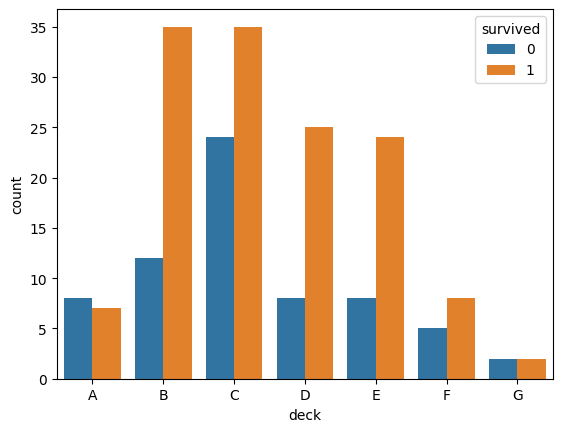

In [21]:
sns.countplot(x="deck", hue="survived", data=df)

<AxesSubplot:xlabel='pclass', ylabel='age'>

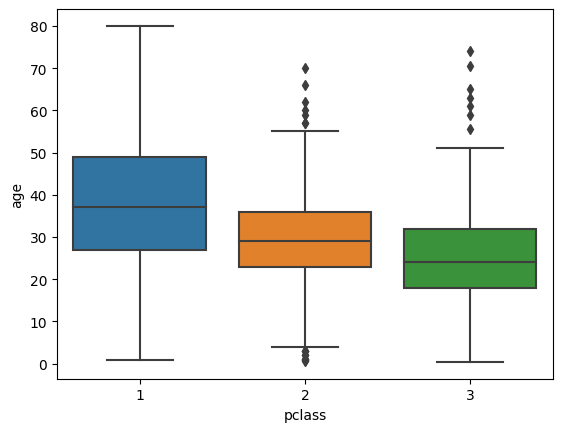

In [23]:
sns.boxplot(x="pclass", y="age", data=df)
# x axis must be categorical variable

In [26]:
def fullna_age(columns: list):
    pclass = columns[0]
    age = columns[1]
    
    if pclass == 1:
        return 38
    elif pclass == 2:
        return 30
    else:
        return 25

    
df['age'] = df[["pclass", "age"]].apply(fullna_age, axis=1)

In [27]:
df['age'].isnull().sum()

0

In [30]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

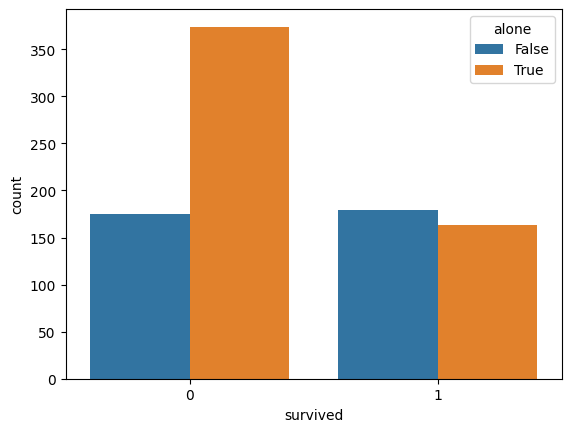

In [31]:
sns.countplot(x="survived", hue="alone", data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

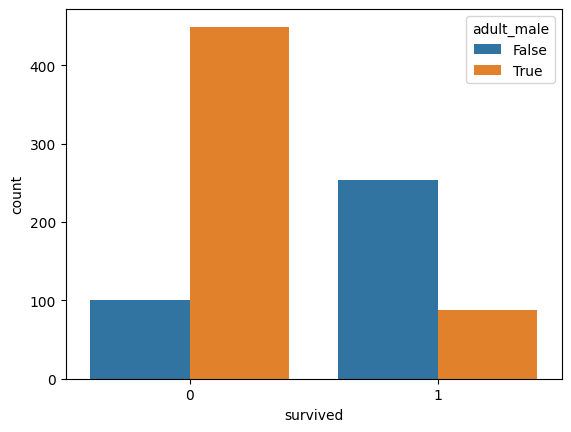

In [32]:
sns.countplot(x="survived", hue="adult_male", data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

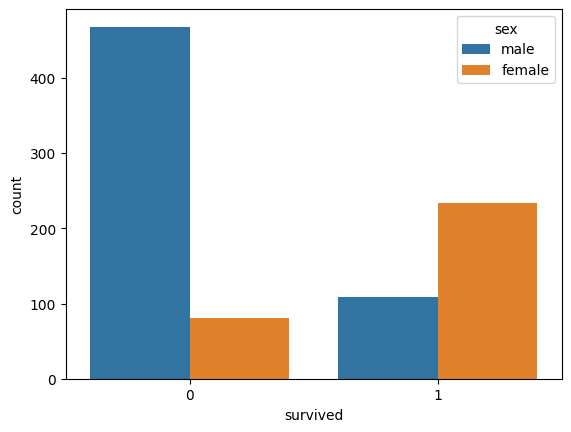

In [34]:
sns.countplot(x="survived", hue="sex", data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

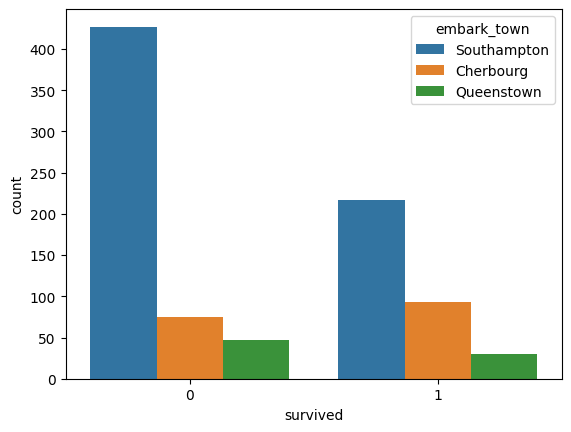

In [35]:
sns.countplot(x="survived", hue="embark_town", data=df)

In [36]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

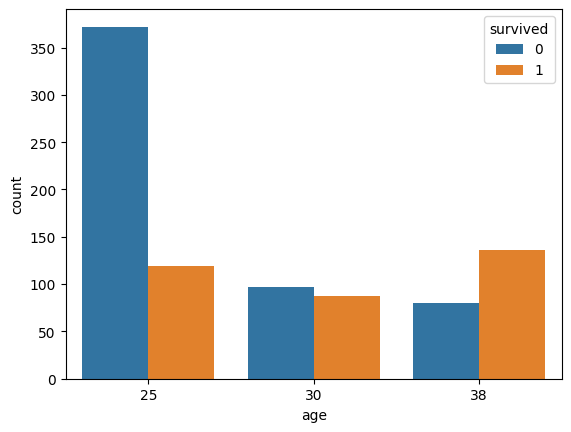

In [37]:
sns.countplot(x="age", hue="survived", data=df)

<AxesSubplot:xlabel='parch', ylabel='count'>

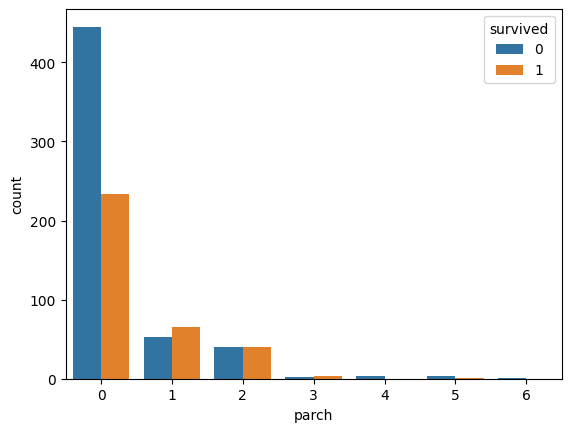

In [39]:
sns.countplot(x="parch", hue="survived", data=df)

<AxesSubplot:xlabel='age', ylabel='Density'>

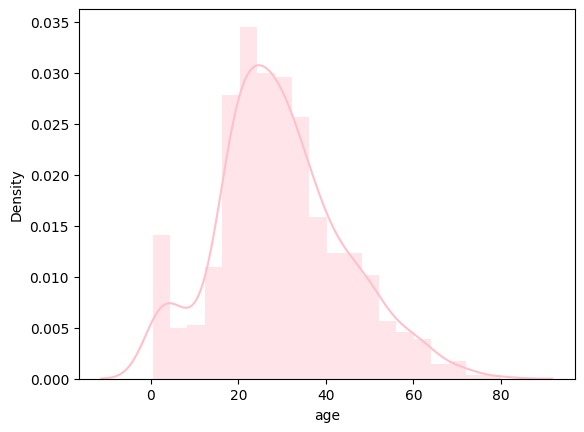

In [9]:
sns.distplot(df['age'], color='pink')

In [10]:
df.drop(["age", "sibsp", "parch"], axis=1, inplace=True)

<AxesSubplot:>

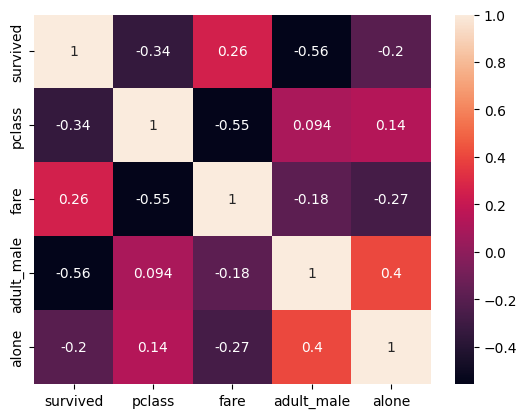

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,survived,pclass,fare,adult_male,alone,sex_male,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,3,7.2500,True,False,1,1,0,0,0,0,0,0,0,0,1
1,1,1,71.2833,False,False,0,0,1,0,1,0,0,0,0,0,0
2,1,3,7.9250,False,True,0,0,1,0,0,0,0,0,0,0,1
3,1,1,53.1000,False,False,0,0,1,0,1,0,0,0,0,0,1
4,0,3,8.0500,True,True,1,1,0,0,0,0,0,0,0,0,1


In [16]:
df.drop(["adult_male", "alone", "deck_B", "deck_C", "deck_D", "deck_E", "deck_F", "deck_G"], axis=1, inplace=True)

In [17]:
df.head()

,survived,pclass,fare,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,7.2500,1,1,0,0,1
1,1,1,71.2833,0,0,1,0,0
2,1,3,7.9250,0,0,1,0,1
3,1,1,53.1000,0,0,1,0,1
4,0,3,8.0500,1,1,0,0,1


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [19]:
from sklearn import metrics 

In [20]:
X = df.drop(['survived'], axis=1)
y = df['survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [22]:
logreg =  LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
compare_log = {"predicted": y_pred, "actual": y_test}
comp_df = pd.DataFrame(compare_log)

In [25]:
comp_df.head()

,predicted,actual
709,0,1
439,0,0
840,0,0
720,1,1
39,1,1


In [26]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   predicted  179 non-null    int64
 1   actual     179 non-null    int64
dtypes: int64(2)
memory usage: 4.2 KB


In [27]:
comp_df[comp_df['predicted'] != comp_df['actual']].shape[0]

,predicted,actual
709,0,1
485,1,0
621,0,1
447,0,1
673,0,1
396,1,0
235,1,0
204,0,1
23,0,1
362,1,0


In [28]:
comp_df[comp_df['predicted'] != comp_df['actual']].shape[0]

38

In [29]:
comp_df.shape[0]

179

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
mean_squared_error(y_test, y_pred)

0.2122905027932961

In [32]:
mean_absolute_error(y_test, y_pred)

0.2122905027932961

In [33]:
r2_score(y_test, y_pred)

0.12458172458172456

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
import os

base_dir = os.getcwd()

In [6]:
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(f"{base_dir}/teleCust.csv")

In [8]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [11]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('-----------------------------')

region
3    344
2    334
1    322
Name: region, dtype: int64
-----------------------------
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64
-----------------------------
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: age, dtype: int64
-----------------------------
marital
0    505
1    495
Name: marital, dtype: int64
-----------------------------
address
1     68
2     66
4     61
3     61
0     56

In [12]:
df.drop(["ed", "employ"], axis=1, inplace=True)

In [13]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


<AxesSubplot:>

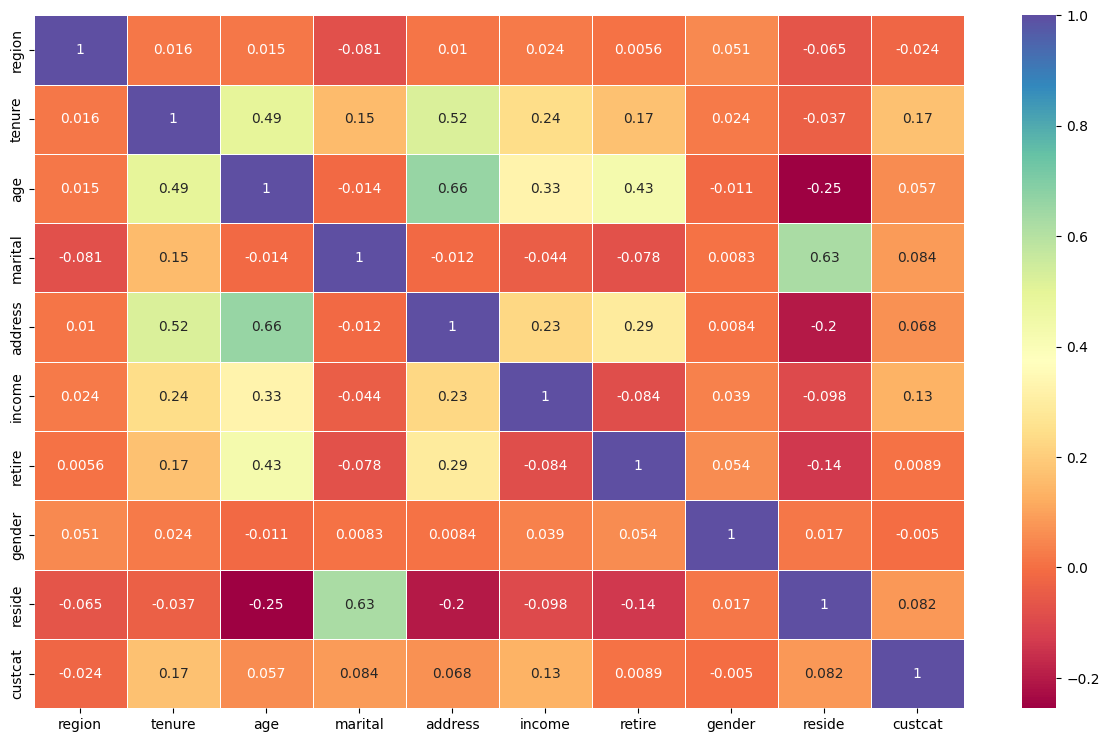

In [17]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="Spectral")

In [18]:
df.drop(["gender", "retire"], axis=1, inplace=True)

<AxesSubplot:>

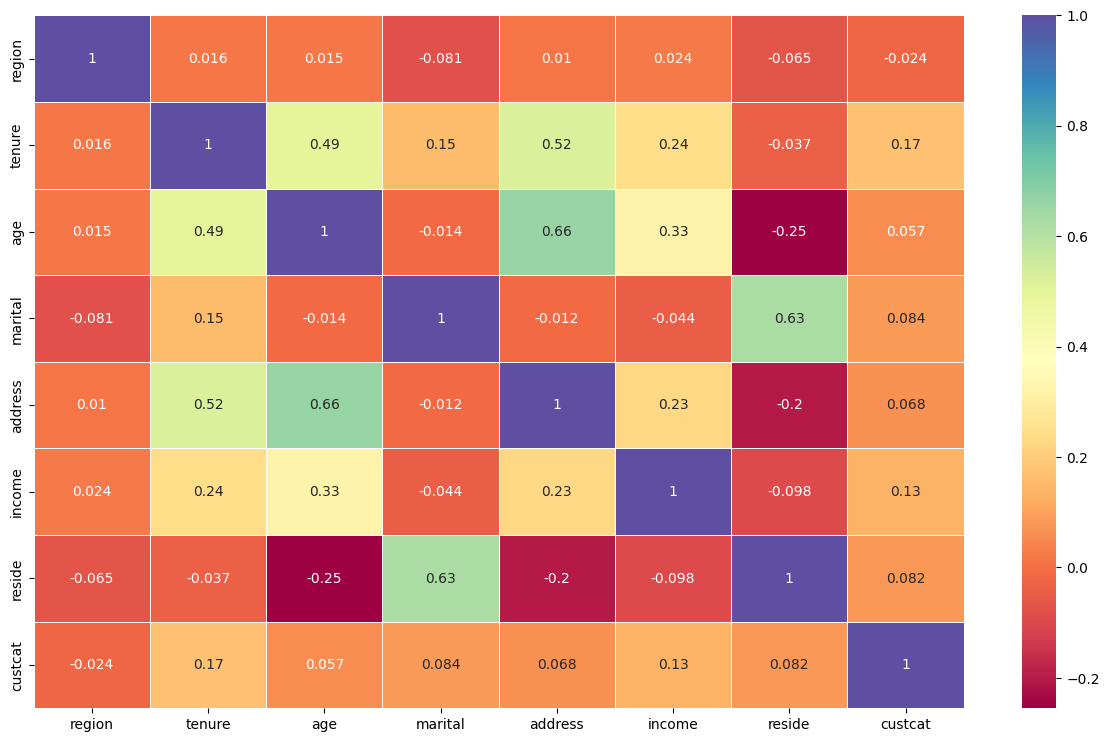

In [19]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="Spectral")

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
region = pd.get_dummies(df['region'], drop_first=True, prefix="region")
marital = pd.get_dummies(df['marital'], drop_first=True, prefix="marital")
reside = pd.get_dummies(df['reside'], drop_first=True, prefix="reside")

In [23]:
pd.concat([df, region, marital, reside], axis=1)

,region,tenure,age,marital,address,income,reside,custcat,region_2,region_3,marital_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,2,13,44,1,9,64.0,2,1,1,0,1,1,0,0,0,0,0,0
1,3,11,33,1,7,136.0,6,4,0,1,1,0,0,0,0,1,0,0
2,3,68,52,1,24,116.0,2,3,0,1,1,1,0,0,0,0,0,0
3,2,33,33,0,12,33.0,1,1,1,0,0,0,0,0,0,0,0,0
4,2,23,30,1,9,30.0,4,3,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,1,0,1,0,0,1,0,0,0,0,0
996,1,7,34,0,2,22.0,1,1,0,0,0,0,0,0,0,0,0,0
997,3,67,59,0,40,944.0,1,4,0,1,0,0,0,0,0,0,0,0
998,3,70,49,0,18,87.0,1,3,0,1,0,0,0,0,0,0,0,0


In [25]:
df.drop(["region", "marital", "reside"], axis=1, inplace=True)

In [26]:
df.head()

,tenure,age,address,income,custcat
0,13,44,9,64.0,1
1,11,33,7,136.0,4
2,68,52,24,116.0,3
3,33,33,12,33.0,1
4,23,30,9,30.0,3


In [27]:
df = pd.concat([df, region, marital, reside], axis=1)

In [28]:
df.head()

,tenure,age,address,income,custcat,region_2,region_3,marital_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,9,64.0,1,1,0,1,1,0,0,0,0,0,0
1,11,33,7,136.0,4,0,1,1,0,0,0,0,1,0,0
2,68,52,24,116.0,3,0,1,1,1,0,0,0,0,0,0
3,33,33,12,33.0,1,1,0,0,0,0,0,0,0,0,0
4,23,30,9,30.0,3,1,0,1,0,0,1,0,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaled_variable = df[["tenure", "age", "address", "income"]]


In [31]:
scaler_model = StandardScaler()

In [32]:
scaler_model.fit(scaled_variable)

StandardScaler()

In [33]:
scaled_variable = scaler_model.transform(scaled_variable)

In [34]:
scaled_variable.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [35]:
df_scaled = pd.DataFrame(scaled_variable, columns=["tenure", "age", "address", "income"])

In [36]:
df_scaled.head()

,tenure,age,address,income
0,-1.055125,0.184505,-0.253034,-0.126506
1,-1.148806,-0.691812,-0.451415,0.546450
2,1.521092,0.821826,1.234819,0.359517
3,-0.118319,-0.691812,0.044536,-0.416251
4,-0.586722,-0.930808,-0.253034,-0.444291


In [37]:
df.drop(["tenure", "age", "address", "income"], axis=1, inplace=True)

In [38]:
df.head()

,custcat,region_2,region_3,marital_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,1,1,0,1,1,0,0,0,0,0,0
1,4,0,1,1,0,0,0,0,1,0,0
2,3,0,1,1,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0
4,3,1,0,1,0,0,1,0,0,0,0


In [39]:
df = pd.concat([df, df_scaled], axis=1)

In [40]:
df.head()

,custcat,region_2,region_3,marital_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income
0,1,1,0,1,1,0,0,0,0,0,0,-1.055125,0.184505,-0.253034,-0.126506
1,4,0,1,1,0,0,0,0,1,0,0,-1.148806,-0.691812,-0.451415,0.546450
2,3,0,1,1,1,0,0,0,0,0,0,1.521092,0.821826,1.234819,0.359517
3,1,1,0,0,0,0,0,0,0,0,0,-0.118319,-0.691812,0.044536,-0.416251
4,3,1,0,1,0,0,1,0,0,0,0,-0.586722,-0.930808,-0.253034,-0.444291


In [41]:
X = df.drop(["custcat"], axis=1)
y = df['custcat']

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (800, 14) (800,)
Test set:  (200, 14) (200,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [49]:
y_pred = knn_model.predict(X_test)

In [50]:
compare_dict = {"actual": y_test, "predicted": y_pred}
df_compare = pd.DataFrame(compare_dict)

In [51]:
df_compare.head()

,actual,predicted
521,2,3
737,1,3
740,2,3
660,3,3
411,1,3


In [52]:
from sklearn import metrics
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy score: 0.325


In [53]:
k = 6
knn_model2 = KNeighborsClassifier(n_neighbors=k)
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [55]:
y_pred2 = knn_model2.predict(X_test)
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_pred2)}")

Accuracy score: 0.335


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
knn_model3 = KNeighborsClassifier()

In [58]:
knn_params = {"n_neighbors": np.arange(1, 50),
              "metric": ["minkowski", "euclidean", "manhattan"],
              "weights": ["uniform", "distance"]}
knn_cv_model = GridSearchCV(estimator=knn_model3, param_grid=knn_params, cv=10)

In [59]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [60]:
knn_cv_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [61]:
knn_tuned = KNeighborsClassifier(n_neighbors=15)

In [63]:
knn_tuned.fit(X_train, y_train)
y_pred2 = knn_tuned.predict(X_test)

In [64]:
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_pred2)}")

Accuracy score: 0.35
